<a href="https://colab.research.google.com/github/AliTarek-1/Project-7.-Car-Price-Prediction-using-Machine-Learning-with-Python-/blob/main/project7_Car_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.metrics import accuracy_score , mean_squared_error , r2_score


In [ ]:
data=pd.read_csv("/content/car data.csv")

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


<Axes: xlabel='Fuel_Type', ylabel='count'>

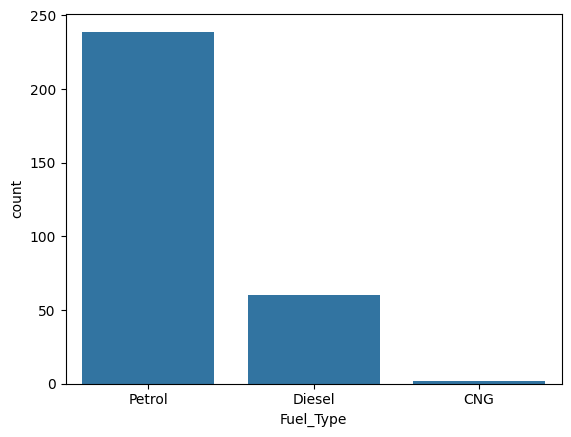

In [ ]:
sns.countplot(x="Fuel_Type",data=data)

<Axes: xlabel='Seller_Type', ylabel='count'>

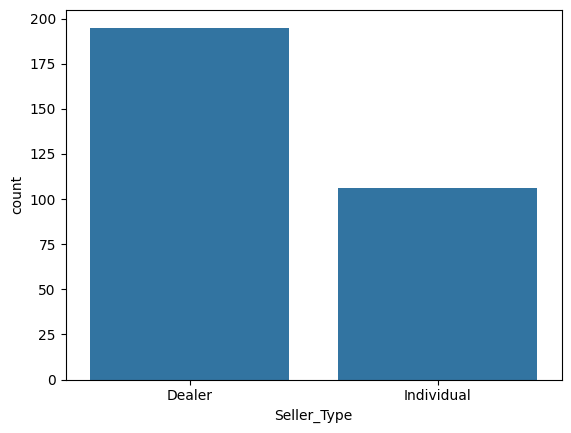

In [ ]:
sns.countplot(x="Seller_Type",data=data)

<Axes: xlabel='Transmission', ylabel='count'>

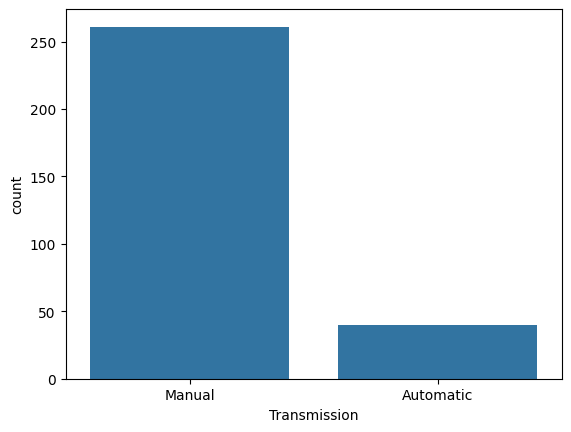

In [ ]:
sns.countplot(x="Transmission",data=data)

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.replace({'Fuel_Type':{'Petrol':0 , 'Diesel' :1 , 'CNG' : 2} ,
              'Seller_Type' :{'Dealer' :0 , 'Individual' :1} ,
              'Transmission' : {'Manual' : 0 , 'Automatic' : 1}}
              , inplace=True)

<ipython-input-17-1069deb7fb5d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Petrol':0 , 'Diesel' :1 , 'CNG' : 2} ,


In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
data.drop(['Car_Name'] , axis=1 , inplace=True)

In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
data.shape

(301, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [ ]:
X=data.drop(['Selling_Price'] , axis=1)
Y=data['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0    2014           5.59       27000          0            0             0      0
1    2013           9.54       43000          1            0             0      0
2    2017           9.85        6900          0            0             0      0
3    2011           4.15        5200          0            0             0      0
4    2014           6.87       42450          1            0             0      0
..    ...            ...         ...        ...          ...           ...    ...
296  2016          11.60       33988          1            0             0      0
297  2015           5.90       60000          0            0             0      0
298  2009          11.00       87934          0            0             0      0
299  2017          12.50        9000          1            0             0      0
300  2016           5.90        5464          0            0             0      0

[301 rows x 7 c

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.1 , random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train , Y_train)

LinearRegression()

In [ ]:
X_train_pred= model.predict(X_train)
X_train_accuracy=r2_score(X_train_pred , Y_train)
print(X_train_accuracy)

0.8644330304147874


In [ ]:
X_test_predict=model.predict(X_test)
X_test_score=r2_score(X_test_predict , Y_test)
print(X_test_score)

0.7593427825981031


In [ ]:
model2=Lasso()
model2.fit(X_train , Y_train)

Lasso()

In [ ]:
X_train_predict= model2.predict(X_train)
X_train_accuracy=r2_score(X_train_predict , Y_train)
print(X_train_accuracy)

0.7998618265707464


In [ ]:
X_test_predict=model2.predict(X_test)
X_test_score=r2_score(X_test_predict , Y_test)
print(X_test_score)

0.6915335810239489
